In [1]:
import pandas as pd
import sys
sys.path.append("/Users/damoncrockett/Desktop/")
import dv
import numpy as np

In [2]:
MAPDIR = "/Users/damoncrockett/Desktop/usermaps/"

In [3]:
df = pd.read_csv("/Users/damoncrockett/astrodata/tables/astrodata_moon_galaxy.csv")

In [4]:
df = df[df.lat.notnull()]

In [5]:
dfu = pd.DataFrame({"user":df.user_nid.unique()})

In [6]:
dfu['mappath'] = MAPDIR + dfu.user + ".png"

In [7]:
dfu['dispersion'] = 0

In [8]:
for i in dfu.index:
    user = dfu.user.loc[i]
    lats = df.lat[df.user_nid==user]
    lons = df.lon[df.user_nid==user]
    dispersion = np.std(lats) + np.std(lons)
    dfu.dispersion.loc[i] = dispersion

/Library/Python/2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
dfu.sort_values(by='dispersion',inplace=True,ascending=False)

In [10]:
#dv.show(dfu.mappath,286)

In [11]:
tmp = dfu[dfu.dispersion >= 10]

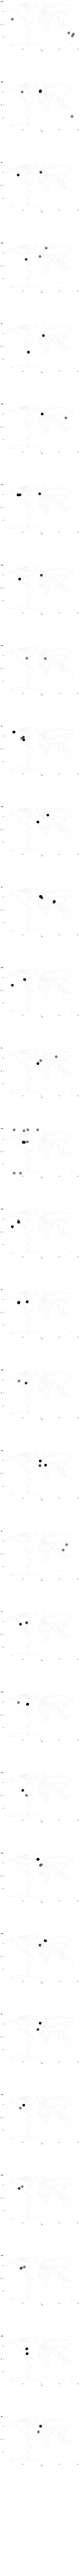

In [15]:
dv.montage(tmp.mappath,tmp,'dispersion',idx=True,thumb=640)